<a href="https://colab.research.google.com/github/wasam0110/ArtificialNueralNetworkLab/blob/main/ANN_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn. functional as F

In [ ]:
import pandas as pd


data_url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(data_url)

print("Dataset loaded successfully. Here are the first 5 rows:")
display(my_df.head())

Dataset loaded successfully. Here are the first 5 rows:


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
class Model(nn.Module):
  def __init__(self, in_features, h1, h2, out_features):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

/tmp/ipython-input-594152360.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
X = my_df.drop('variety', axis=1)
y = my_df['variety']


In [ ]:
X=X.values
y=y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
model = Model(in_features=4, h1=8, h2=8, out_features=3)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.2270225286483765
Epoch: 10 and loss: 0.9555111527442932
Epoch: 20 and loss: 0.7572522759437561
Epoch: 30 and loss: 0.5645612478256226
Epoch: 40 and loss: 0.43758898973464966
Epoch: 50 and loss: 0.3579690754413605
Epoch: 60 and loss: 0.28337275981903076
Epoch: 70 and loss: 0.20987771451473236
Epoch: 80 and loss: 0.15143269300460815
Epoch: 90 and loss: 0.11413558572530746


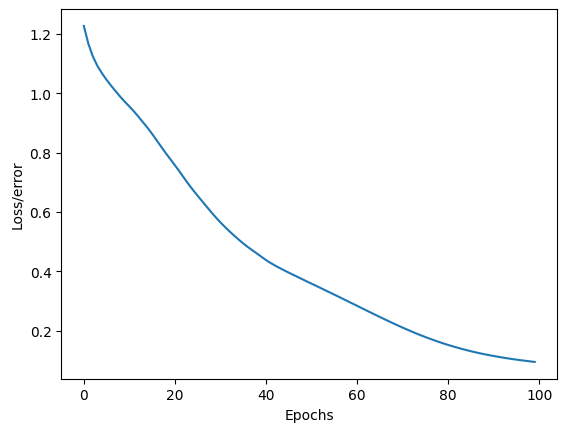

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epochs')
plt.show()

In [ ]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

To load a dataset, you can either upload it to your Colab environment (e.g., by dragging and dropping a file into the files panel on the left), or if it's publicly available, you can load it directly from a URL. Below is an example of how to load a CSV file into a pandas DataFrame: